<a href="https://colab.research.google.com/github/Praharshita1275/Machine-learning/blob/main/ML_Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# SUPPORT VECTOR MACHINES (SVM)
# Based on Cortes & Vapnik (1995)

import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# STEP 1: Load Dataset
# import load_iris function from datasets module
from sklearn.datasets import load_iris
# save "bunch" object containing iris dataset and its attributes
iris = load_iris()
# print the iris data
iris = datasets.load_iris()
X, y = iris.data, iris.target   # X = features (sepal/petal length & width), y = species labels

In [ ]:
# STEP 2: Split Dataset

# Train-Test split (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)


In [ ]:
# STEP 3: Baseline SVM Model

# Create an SVM classifier with default parameters
baseline_svm = SVC()

# Train the baseline model
baseline_svm.fit(X_train, y_train)

# Make predictions on test data
y_pred_baseline = baseline_svm.predict(X_test)

# Evaluate baseline performance
print("Baseline SVM Results ")
print(classification_report(y_test, y_pred_baseline))
print("Accuracy:", accuracy_score(y_test, y_pred_baseline))


Baseline SVM Results 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

Accuracy: 1.0


In [ ]:
# STEP 4: Hyperparameter Tuning with GridSearchCV

# Define a parameter grid to test different hyperparameters
param_grid = {
    'C': [0.1, 1, 10, 100],            # Regularization strength
    'gamma': [1, 0.1, 0.01, 0.001],    # Kernel coefficient
    'kernel': ['linear', 'poly', 'rbf'], # Different kernel functions
    'degree': [2, 3, 4]                # Only used when kernel='poly'
}

# GridSearchCV will try all combinations of parameters
# cv=5 → 5-fold cross-validation for reliable evaluation
grid_search = GridSearchCV(SVC(), param_grid, refit=True, verbose=2, cv=5)

# Train with hyperparameter search
grid_search.fit(X_train, y_train)

# Print best parameters found
print("\nBest Parameters from GridSearch:", grid_search.best_params_)


Fitting 5 folds for each of 144 candidates, totalling 720 fits
[CV] END ............C=0.1, degree=2, gamma=1, kernel=linear; total time=   0.0s
[CV] END ............C=0.1, degree=2, gamma=1, kernel=linear; total time=   0.0s
[CV] END ............C=0.1, degree=2, gamma=1, kernel=linear; total time=   0.0s
[CV] END ............C=0.1, degree=2, gamma=1, kernel=linear; total time=   0.0s
[CV] END ............C=0.1, degree=2, gamma=1, kernel=linear; total time=   0.0s
[CV] END ..............C=0.1, degree=2, gamma=1, kernel=poly; total time=   0.0s
[CV] END ..............C=0.1, degree=2, gamma=1, kernel=poly; total time=   0.0s
[CV] END ..............C=0.1, degree=2, gamma=1, kernel=poly; total time=   0.0s
[CV] END ..............C=0.1, degree=2, gamma=1, kernel=poly; total time=   0.0s
[CV] END ..............C=0.1, degree=2, gamma=1, kernel=poly; total time=   0.0s
[CV] END ...............C=0.1, degree=2, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...............C=0.1, degree=2, gamma

In [ ]:
# STEP 5: Evaluate Tuned Model

# Use the best model found by GridSearchCV
best_svm = grid_search.best_estimator_

# Make predictions on the test set
y_pred_tuned = best_svm.predict(X_test)

# Evaluate tuned model performance
print("\n Tuned SVM Results")
print(classification_report(y_test, y_pred_tuned))
print("Accuracy:", accuracy_score(y_test, y_pred_tuned))


 Tuned SVM Results
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

Accuracy: 1.0


In [ ]:
# STEP 6: Compare Baseline vs Tuned Results

baseline_acc = accuracy_score(y_test, y_pred_baseline)
tuned_acc = accuracy_score(y_test, y_pred_tuned)

print("\nBaseline Accuracy:", baseline_acc)
print("Tuned Accuracy:", tuned_acc)


Baseline Accuracy: 1.0
Tuned Accuracy: 1.0


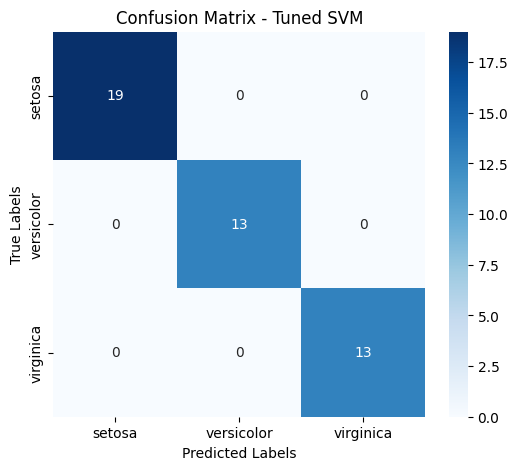

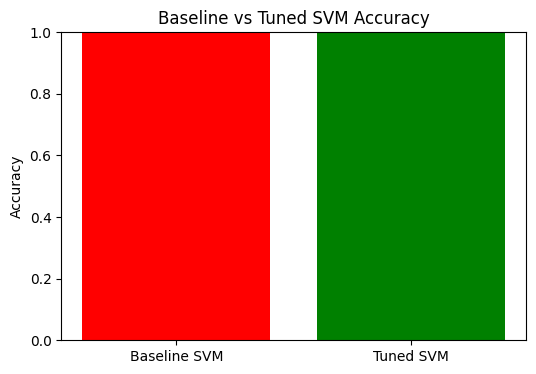

In [ ]:
# STEP 7: Visualization
# Confusion Matrix for Tuned Model
cm = confusion_matrix(y_test, y_pred_tuned)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d",
            xticklabels=iris.target_names,
            yticklabels=iris.target_names)
plt.title("Confusion Matrix - Tuned SVM")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Bar chart comparing baseline vs tuned accuracy
plt.figure(figsize=(6,4))
plt.bar(["Baseline SVM", "Tuned SVM"], [baseline_acc, tuned_acc], color=["red", "green"])
plt.title("Baseline vs Tuned SVM Accuracy")
plt.ylabel("Accuracy")
plt.ylim(0,1)
plt.show()
